https://fivethirtyeight.com/features/can-you-score-some-basketball-tickets/?ex_cid=the-riddler

## Express

Without knowing how anyone else did on the scavenger hunt, what is the highest score that guarantees you are in the top 10? (Being tied for 10th is acceptable.)


We want to define the combination of top 10 scores with the least dispersion amonst them.

In [6]:
import pandas as pd

In [7]:
# Rounds 1/2 lookup
lookup = {
    1:10,
    2:9,
    3:8,
    4:7,
    5:6,
    6:5,
    7:4,
    8:3,
    9:2,
    10:1,
}

In [8]:
sim_scores = []
for game_id in range(1, 4):
    for score_iter in range(1, 11):
        
        sim_scores.append([score_iter, lookup[score_iter]])
        


In [9]:
pd.DataFrame(sim_scores).sum(axis=1)

0     11
1     11
2     11
3     11
4     11
5     11
6     11
7     11
8     11
9     11
10    11
11    11
12    11
13    11
14    11
15    11
16    11
17    11
18    11
19    11
20    11
21    11
22    11
23    11
24    11
25    11
26    11
27    11
28    11
29    11
dtype: int64

We have forced scenarios such that all scores for the first two rounds are now equivalently 11. One of them **has** to get a 10 for round 3 meaning that a score of 21 **guerantees** someone will be in the top 10. 

### Solution: A score of 21 guerantees we will be in the top 10!

# Classic

From Ed Carl comes a surprising game of dice:

We’re playing a game where you have to pick four whole numbers. Then I will roll four fair dice. If any two of the dice add up to any one of the numbers you picked, then you win! Otherwise, you lose.

For example, suppose you picked the numbers 2, 3, 4 and 12, and the four dice came up 1, 2, 4 and 5. Then you’d win, because two of the dice (1 and 2) add up to at least one of the numbers you picked (3).

To maximize your chances of winning, which four numbers should you pick? And what are your chances of winning?

In [78]:
from collections import Counter

In [80]:
from itertools import combinations_with_replacement, combinations, permutations

In [73]:
from plotnine import *

In [16]:
dice_sims = list(combinations_with_replacement(range(1, 7), 4))

In [103]:
all_two_dice_sums = []
for sim_iter in dice_sims:
    sim_iter_combs = list(combinations(sim_iter, 2))
    sim_iter_two_dice_sum = np.sum(sim_iter_combs, axis=1)
    all_two_dice_sums.extend(sim_iter_two_dice_sum)
   

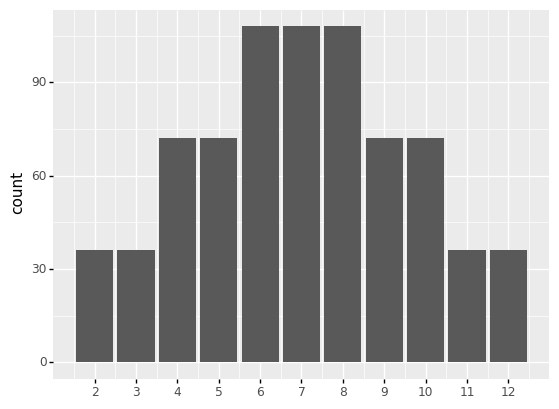

<ggplot: (8777314559242)>

In [104]:
breaks = list(range(min(all_two_dice_sums), max(all_two_dice_sums) + 1))

qplot(all_two_dice_sums, geom='bar') + scale_x_continuous(breaks=breaks)

In [105]:
counts = pd.DataFrame.from_dict(dict(Counter(all_two_dice_sums)), orient='index').reset_index()
counts.columns = ['sum', 'count']

In [106]:
counts['counts_normalized'] = counts['count'] / counts['count'].sum()

<AxesSubplot:xlabel='sum'>

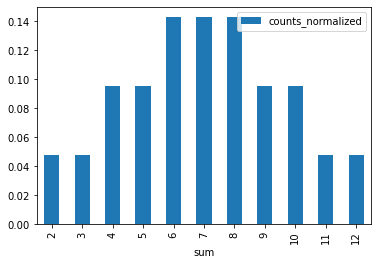

In [111]:
counts.plot(x='sum' ,y='counts_normalized', kind='bar')

In [112]:
counts

,sum,count,counts_normalized
0,2,36,0.047619
1,3,36,0.047619
2,4,72,0.095238
3,5,72,0.095238
4,6,108,0.142857
5,7,108,0.142857
6,8,108,0.142857
7,9,72,0.095238
8,10,72,0.095238
9,11,36,0.047619


In [114]:
prob_of_winner = counts[counts['sum'].isin([5, 6, 7, 8])].counts_normalized.sum()
prob_of_winner

0.5238095238095237

## Answer
We should select 6, 7, and 8 as our numbers and one of 4, 5, 9, or 10 as our 4th number

Our chance of winning is 52.4%